# Sentiment Analysis
![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/0cc39c70021d21fc0d2fd7a986ccd242bef86c29/6-Figure1-1.png)

In [1]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [2]:
sentence = "i really like you but you can be so dumb some times"

## NLTK Vader

In [3]:
# import nltk
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()

ModuleNotFoundError: No module named 'nltk'

In [ ]:
# sid.polarity_scores(sentence)

In [ ]:
# visualise_sentiments({
#     "Sentence":["SENTENCE"] + sentence.split(),
#     "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
# })

## TextBlob

In [ ]:
# from textblob import TextBlob

In [ ]:
# TextBlob(sentence).sentiment

In [ ]:
# visualise_sentiments({
#       "Sentence":["SENTENCE"] + sentence.split(),
#       "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
#       "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
# })

## Flair

In [4]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2020-03-05 16:42:05,803 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models-v0.4/classy-imdb-en-rnn-cuda%3A0/imdb-v0.4.pt not found in cache, downloading to C:\Users\benjamin\AppData\Local\Temp\tmplyc2g1o1


100%|██████████| 1501979561/1501979561 [22:58<00:00, 1089291.16B/s]

2020-03-05 17:05:05,523 copying C:\Users\benjamin\AppData\Local\Temp\tmplyc2g1o1 to cache at C:\Users\benjamin\.flair\models\imdb-v0.4.pt


2020-03-05 17:05:08,195 removing temp file C:\Users\benjamin\AppData\Local\Temp\tmplyc2g1o1
2020-03-05 17:05:08,377 loading file C:\Users\benjamin\.flair\models\imdb-v0.4.pt


In [5]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

[POSITIVE (0.9951706528663635)]

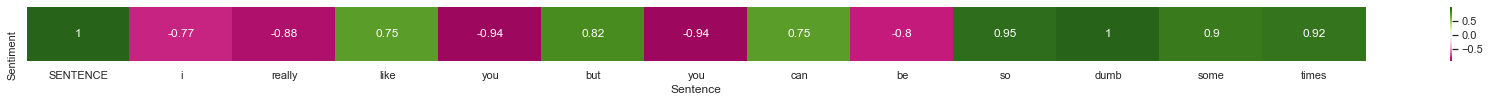

In [6]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

## DeepMoji (Emotions via Emojis)

In [ ]:
!pip3 install torch==1.0.1 -f https://download.pytorch.org/whl/cpu/stable 
!git clone https://github.com/huggingface/torchMoji
import os
os.chdir('torchMoji')
!pip3 install -e .

type "yes" when prompted

In [ ]:
!python3 scripts/download_weights.py

In [ ]:
!python3 examples/text_emojize.py --text f" {sentence} "

In [ ]:
import numpy as np
import emoji, json
from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
from torchmoji.sentence_tokenizer import SentenceTokenizer
from torchmoji.model_def import torchmoji_emojis
  
EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: :pensive: :ok_hand: :blush: :heart: :smirk: :grin: :notes: :flushed: :100: :sleeping: :relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: :sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: :neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: :v: :sunglasses: :rage: :thumbsup: :cry: :sleepy: :yum: :triumph: :hand: :mask: :clap: :eyes: :gun: :persevere: :smiling_imp: :sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: :wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: :angry: :no_good: :muscle: :facepunch: :purple_heart: :sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')
model = torchmoji_emojis(PRETRAINED_PATH)
with open(VOCAB_PATH, 'r') as f:
  vocabulary = json.load(f)
st = SentenceTokenizer(vocabulary, 30)

def deepmojify(sentence,top_n =5):
  def top_elements(array, k):
    ind = np.argpartition(array, -k)[-k:]
    return ind[np.argsort(array[ind])][::-1]

  tokenized, _, _ = st.tokenize_sentences([sentence])
  prob = model(tokenized)[0]
  emoji_ids = top_elements(prob, top_n)
  emojis = map(lambda x: EMOJIS[x], emoji_ids)
  return emoji.emojize(f"{sentence} {' '.join(emojis)}", use_aliases=True)

In [ ]:
deepmojify(sentence, top_n = 3)